# 图像处理+180776+胡欣毅(Python版)
# 12周上课随堂任务

1. 用高斯核对图像某点选取一个ROI范围,其他置0。作FFT查看fft图特征(二维)
2. 取图像某行(某列),用高斯核对行选取一个ROI范围,其他置0。作FFT查看fft图特征(一维)

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.fftpack import fft, ifft
%matplotlib inline

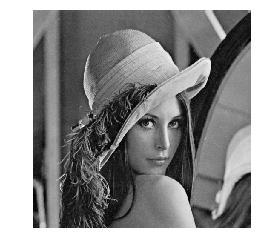

In [2]:
im = cv2.imread('../lena_std.tif')
gray = cv2.cvtColor(im , cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()

## 二维局部FFT

$$ F(u,v,a,b) = \iint h(x-a,y-b)f(x,y) e^{-2\pi i(x \cdot u+y\cdot v)} dxdy $$

In [3]:
ker_size = 21
x = cv2.getGaussianKernel(ker_size , 2.0)#高斯滤波器
ker = x * x.T
m,n = ker.shape

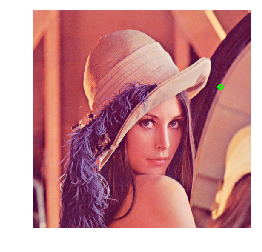

In [4]:
# 选点
i,j = 440,180

cv2.circle(im, (i,j), 5, (0, 255, 0), 4)
im = cv2.cvtColor(im , cv2.COLOR_RGB2BGR) 
plt.imshow(im,cmap='gray')
plt.axis("off")
plt.show()

In [5]:
result = np.zeros_like(gray,dtype=complex)
tmp = np.zeros_like(gray)
tmp[i-m//2:i+1+m//2,j-n//2:j+1+n//2] = np.multiply(\
        gray[i-m//2:i+1+m//2,j-n//2:j+1+n//2],ker)

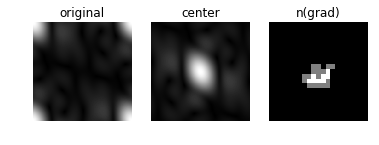

In [6]:
fy = np.fft.fft2(tmp)
fshifty = np.fft.fftshift(fy)
plt.figure()
plt.subplot(131)
plt.axis('off')
plt.imshow(np.abs(fy),'gray')
plt.title('original')
plt.subplot(132)
plt.axis('off')
plt.imshow(np.abs(fshifty),'gray')
plt.title('center')
plt.subplot(133)
plt.axis('off')
plt.imshow(np.abs(tmp[i-m//2:i+1+m//2,j-n//2:j+1+n//2]),'gray')
plt.title('n(grad)')
plt.show()

***图像梯度方向与FFT方向垂直***

## 一维局部FFT

$$ F(u,a) = \iint h(x-a)f(x) e^{-2\pi i(x \cdot u)} dx $$

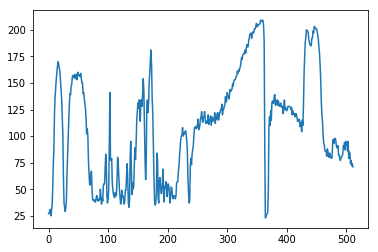

In [7]:
data = gray[i,:]
plt.figure()
plt.plot(data)
plt.show()

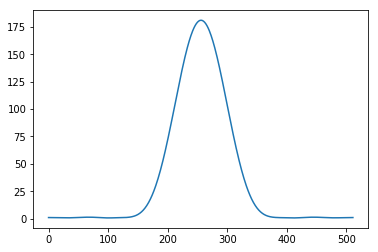

In [8]:
#i = 100
tmp = np.zeros_like(data)
tmp[i-m//2:i+m//2+1] = np.multiply(data[i-m//2:i+m//2+1],x.T)
res = fft(tmp)
res_fshift = np.fft.fftshift(res)

plt.figure()
plt.plot(np.abs(res_fshift))
plt.show()

## 高斯函数的傅里叶变换

$$ h(x-a) e^{-2\pi i(x \cdot u)} $$

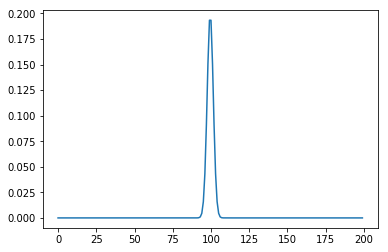

In [9]:
N = 50
gass = cv2.getGaussianKernel(200 , 2.0)#高斯滤波器
gass_fft = fft(gass)
plt.figure()
plt.plot(np.abs(gass_fft))
plt.show()

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)